##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)     |     [Neste >](8%20-%20git%2C%20pythonfiler%20og%20IDE.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 7 - løkker og simulering </span>  

Løkker er noe av det mest brukte verktøyet for en programmerer. EN løkke er en programkode som repeteres. Det finnes i hovedsak to typer løkker i Python: `while`-løkker og `for`-løkker. En `while` lar løkken løpe til en betingelse er oppfylt, mens `for` løkken repeterer koden for alle elementene i en liste eller annen *iterativ datastruktur*. 

# For-løkker

Her er eksempel på en `for`-løkke som deriverer alle utrykkene i listen `expressions`:

#### Eksempel 1:

In [1]:
from IPython.display import Markdown, display
import sympy as sp

x,y=sp.symbols("x y")

expressions=[
    sp.root(x,y),
    x**2+5*sp.exp(x),
    x*sp.ln(x)
]

for i in expressions:
    display(Markdown(f"Den deriverte av ${sp.latex(i)}$ er ${sp.latex(sp.diff(i,x))}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

Eller du kan bare gjøre en enkel iterasjon for heltall fra en startverdi til en sluttverdi:

#### Eksempel 2:

In [2]:
for i in range(5,8):
    print(i)
    
for i in range(3):
    print(i)

5
6
7
0
1
2


Du kan også "pakke ut" elementer, dersom hvert element i `for`-setningen har et bestemt antall sub-elementer. La oss først lage en liste som inneholder en ´tuple´ med uttrykkene i `expressions` over, og den deriverte av disse:

#### Eksempel 3:

In [3]:
#using list comprehension to generate a list with expression,derivative tuples:
expressions_w_derivatives=[ (i, sp.diff(i,x)) for i in expressions ]
expressions_w_derivatives

[(x**(1/y), x**(1/y)/(x*y)),
 (x**2 + 5*exp(x), 2*x + 5*exp(x)),
 (x*log(x), log(x) + 1)]

Vi kan nå kjøre en for-løkke som forventer at hvert element i listen er en *iterabel* (for eksempel liste eller tuple) med to elementer:

#### Eksempel 4

In [4]:

for function,derivative in expressions_w_derivatives:
    display(Markdown(f"Den deriverte av ${sp.latex(function)}$ er ${sp.latex(derivative)}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

# While-løkker

En `while`-løkke er en løkke som fortsetter inntil en betingelse er oppfylt. I eksemplet under ser vi at det genereres nye tilfeldige aksjekurser så lenge kursen er under 125 kroner . 

Aksjen skal bevege seg tilfeldig. For å få til det bruker vi funksjonen `rand` fra `random`-modulen i numpy.  `np.random.rand()` gir et tilfeldig tall mellom null og én, så ved å multiplisere `(np.random.rand()-0.5)` med 40, får vi et tilfeldig tall mellom -20 og 20. 

#### Eksempel 5:

In [5]:
import numpy as np

dy,y=0,100

while y<125:  
    y+=dy
    dy=40*(np.random.rand()-0.5) 
    print(y)

100
113.67785858735652
123.70212767043702
124.69658497973576
105.53659726207536
112.43045916021119
113.48241456611274
94.0414518698944
78.17808449045364
90.68874103686369
86.12061794946803
102.29072442539314
106.05794948799866
93.41650507710816
75.11271377327208
87.54776540837346
77.72009737219048
91.21370456892484
85.09691279881886
70.68862390593199
56.9239355107954
64.31907828660393
44.926886648096925
61.22923842010054
57.236172331623806
58.64570517370926
43.792464565403336
42.172407238783606
51.556751719140905
40.73504771296432
23.75732540700981
41.41240514273378
33.00233835064016
20.918715468461013
29.717749785005957
34.61186387022859
35.82647453529398
19.719518035731554
11.166689706928583
-0.26100210070644536
14.908724825124104
14.969878851472952
26.052419967184676
33.30037936413651
46.04012102949142
57.41837163230592
77.04283403252153
87.24922124585936
73.47901700516317
65.14795561479883
65.94204016796392
65.23956904957538
75.18602421683237
90.2948626858795
107.54836637382553
125

Legg spesielt merke til `y+=dy` over. Denne operasjonen legger `dy` til `y`, og tilsvarer altså `y=y+dy`. De aller fleste programmeringsspråk støtter `+=`-operatoren.  

Legg også merke til at vi kan sette flere variabler samtidig, ved å skille både variablene og verdiene med like mange kommaer, `dy,y=0,100`

# Simulering

Løkker kan brukes til mye, så la oss se på et eksempel på simulering. Simulering vil si å trekke tilfeldige tall for å se hvordan en modell opptrer under usikkerhet. La oss for eksempel tenke oss en aksje som starter på hundre kroner, og så beveger seg tilfeldig. Vi ser på aksjen hvert sjette minutt, eller én tidel (0.1) av én time. Tiden øker dermed med 0.1 i hver periode. 

For å tegne opp stien til aksjekursen, lager vi først lister for x- og y-verdiene, og så legger vi til elementer i hver av listene med `append`-funksjonen til listeobjektene, før listen plottes som en graf. Kjør koden flere ganger, for å se ulike simuleringer. 

#### Eksempel 6:

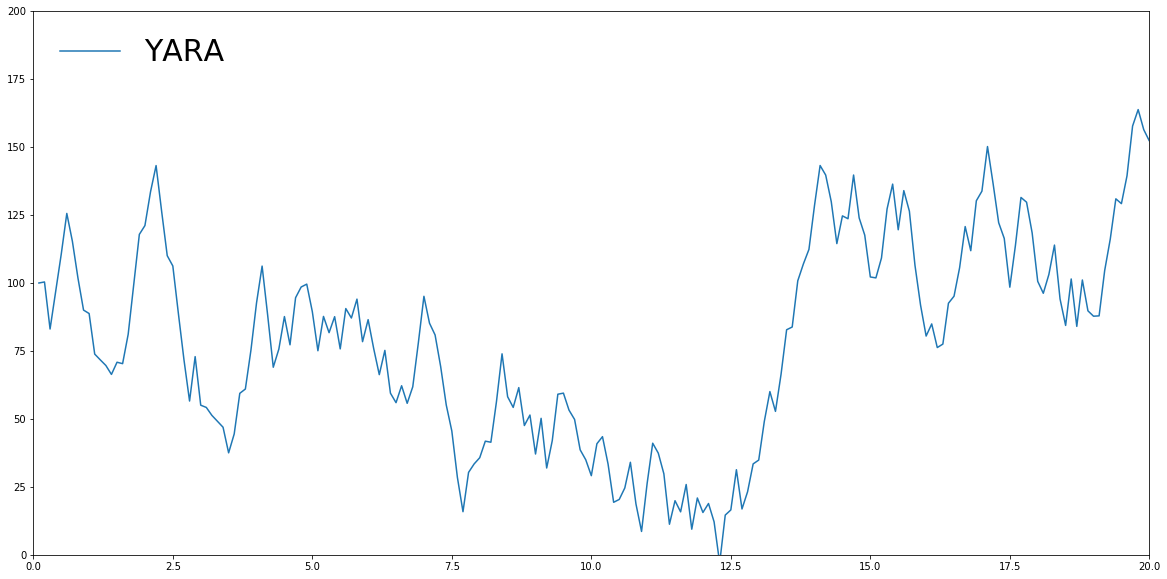

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0,200])
ax.set_xlim([0,20])

x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
ax.plot(xpath,ypath,label='YARA')
ax.legend(loc='upper left',frameon=False,fontsize=30)


# Dynamisk plott

Om vi ønsker å formidle kunnskap, er det av og til nyttig med dynamiske plott. Altså plott som endrer seg mens du ser på dem. Vi kan gjøre det ved å rykke inn de to siste setningene i Eksempel 7 over. Det er disse setningene som lager plottet. Ved å rykke dem inn, plottes figuren i hver iterasjon. 

I utgangspunktet vil du da få 25 figurer etter hverandre. For at figuren skal tegnes i samme figur hver gang, må vi slette figuren i figurobjektet `ax` og i visningen (`clear_output(wait = True)`). Vi må da også sette akseintervallene på nytt. Dette er gjort i de fire siste setningene:

#### Eksempel 7:

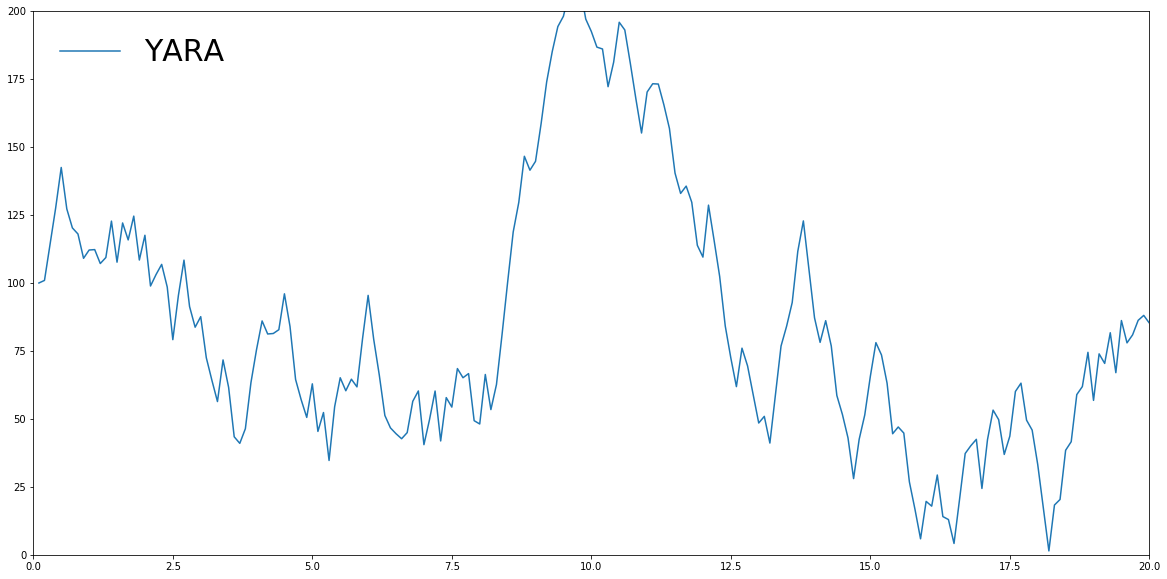

In [ ]:
x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
    
    #placing the plot function inside the loop, ensures that it is plotted every iteration
    ax.plot(xpath,ypath,label='YARA')
    ax.legend(loc='upper left',frameon=False,fontsize=30)
    
    #jupyter only shows the last statement by default, so we need to add this 
    #in order to plot at every iteration
    display(fig)
    
    #makes sure the plot and output are ereased each time:
    ax.cla()
    ax.set_ylim([0,200])
    ax.set_xlim([0,20])
    clear_output(wait = True)

# Legge til litt effekter

Det er også gøy med litt effekter når vi skal formidle noe, bare det ikke blir så mye at det drar oppmerksomheten bort fra det vi skal formidle. I denne simuleringen er det veldig fristende å lage en lite rød prikk som "leder" aksjekursen videre. Vi skal også legge til en liten tekst som forteller hva aksjekursen er:

#### Eksempel 8:

In [ ]:
x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
    
    #placing the plot function inside the loop, ensures that it is plotted every iteration
    ax.plot(xpath,ypath,label='YARA')
    ax.legend(loc='upper left',frameon=False,fontsize=30)
    
    #making dot:
    c=Ellipse((x, y), 0.25,5, color='r')
    ax.add_patch(c)
    
    #making text:
    ax.text(x+0.1,y+3,f'NOK {np.round(y,1)}')
    
    #jupyter only shows the last statement by default, so we need to add this 
    #in order to plot at every iteration
    display(fig)
    
    #makes sure the plot and output are ereased each time:
    ax.cla()
    ax.set_ylim([0,200])
    ax.set_xlim([0,20])
    clear_output(wait = True)

Selv om det går an å bruke jupyter og matplotlib til å lage visuelle effekter, går det litt tregt om du skal lage noer mer avansert. Den mest vanlige pakken for å lage grafisk brukergrensesnitt i Python heter ´tkinter´. Vi går imidlertid ikke inn på denne pakken i dette kurset.  

# Oppgaver

1. Du vil raskt oppdage et problem med koden i Eksempel 8. Aksjekursen kan bli negativ. Dette kan unngås ved å plotte *eksponenenten* av prosessen, i stedet. Dette kan du få til på følgende måte 
    1. Omdøp `y` i `y+= dy` til `lny`, og husk å gjør det samme øverst 
    2. Endre startverdien til lny øverst i koden fra 100 til 0.
    2. Eksponenten liker ikke store tall som argument, så fjern `40*` fra definisjonen av `dy` inne i while-løkken.
    2. definer en ny `y`som settes lik hundre ganger eksponenten til `lny`. Bruk `exp()`-funksjonen til numpy. 
3. Lag dynamiske aksjeintervall for y-aksen, slik at største aksjekurs alltid er minst ti prosent mer enn den simulerte kursen.
4. Lag dynamisk aksjeintervall for x-aksen, slik at når tiden passerer 20, så økes intervallet. La intervallet alltid være minst ti prosent lengre enn den simulerte tiden. 
2. Kommenter ut (sett `#` foran) hver av de siste linjene i Eksempel ??, én om gangen, og se hva som skjer. 

##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)    |      <span style="color:lightgrey">Neste></span>